# DAY1+DAY2+DAY3+DAY4の内容でKickstarter Projectsを解いてみる

## Kickstarter Projectsとは

・クラウドファンディングが成功するかどうか(state)を予測するコンペ  
・URL: https://www.kaggle.com/kemical/kickstarter-projects

## DAY1の内容

・目的変数と説明変数の関係を確認するためのグラフを作成する  
・分類の場合は, ロジスティック回帰  
・質的変数が扱えないアルゴリズムを使う場合は, ダミー変数に置き換える  
・識別精度を確認する(混同行列を作成し, Accuracy, Recall, Precisionを求める)  

## DAY2の内容

・汎化誤差をホールドアウト法と交差検証法によってそれぞれ評価する  
・正則化によって, 出力への寄与が小さい影響は無視して、出力への影響が大きい良い特徴だけでモデルを構成  
・正規化、標準化の重要性（正規化・標準化・無相関化・白色化)  
・サポートベクターマシン(カーネルトリック)  
・グリッドサーチ

## DAY3の内容

・特徴選択（フィルタ法・ラッパー法・埋め込み法）  
・モデル（決定木→(アンサンブル学習)ランダムフォレスト, アダブースト・ニューラルネットワーク）  

## DAY4の内容

・CNN  
・RNN  
・K-means法  
・主成分分析  
・オートエンコーダ

## まだやっていないこと

・欠損値・異常値の適切な処理     
・カテゴリーが多すぎる時のダミー変数の処理 など 

-----------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_blobs
import seaborn as sns

## データ読み込み

In [2]:
initialdf = pd.read_csv("archive/ks-projects-201801.csv")
initialdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 基礎集計

In [5]:
initialdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
#データの平均, 標準偏差, 最大値, 最小値などを集計
initialdf.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


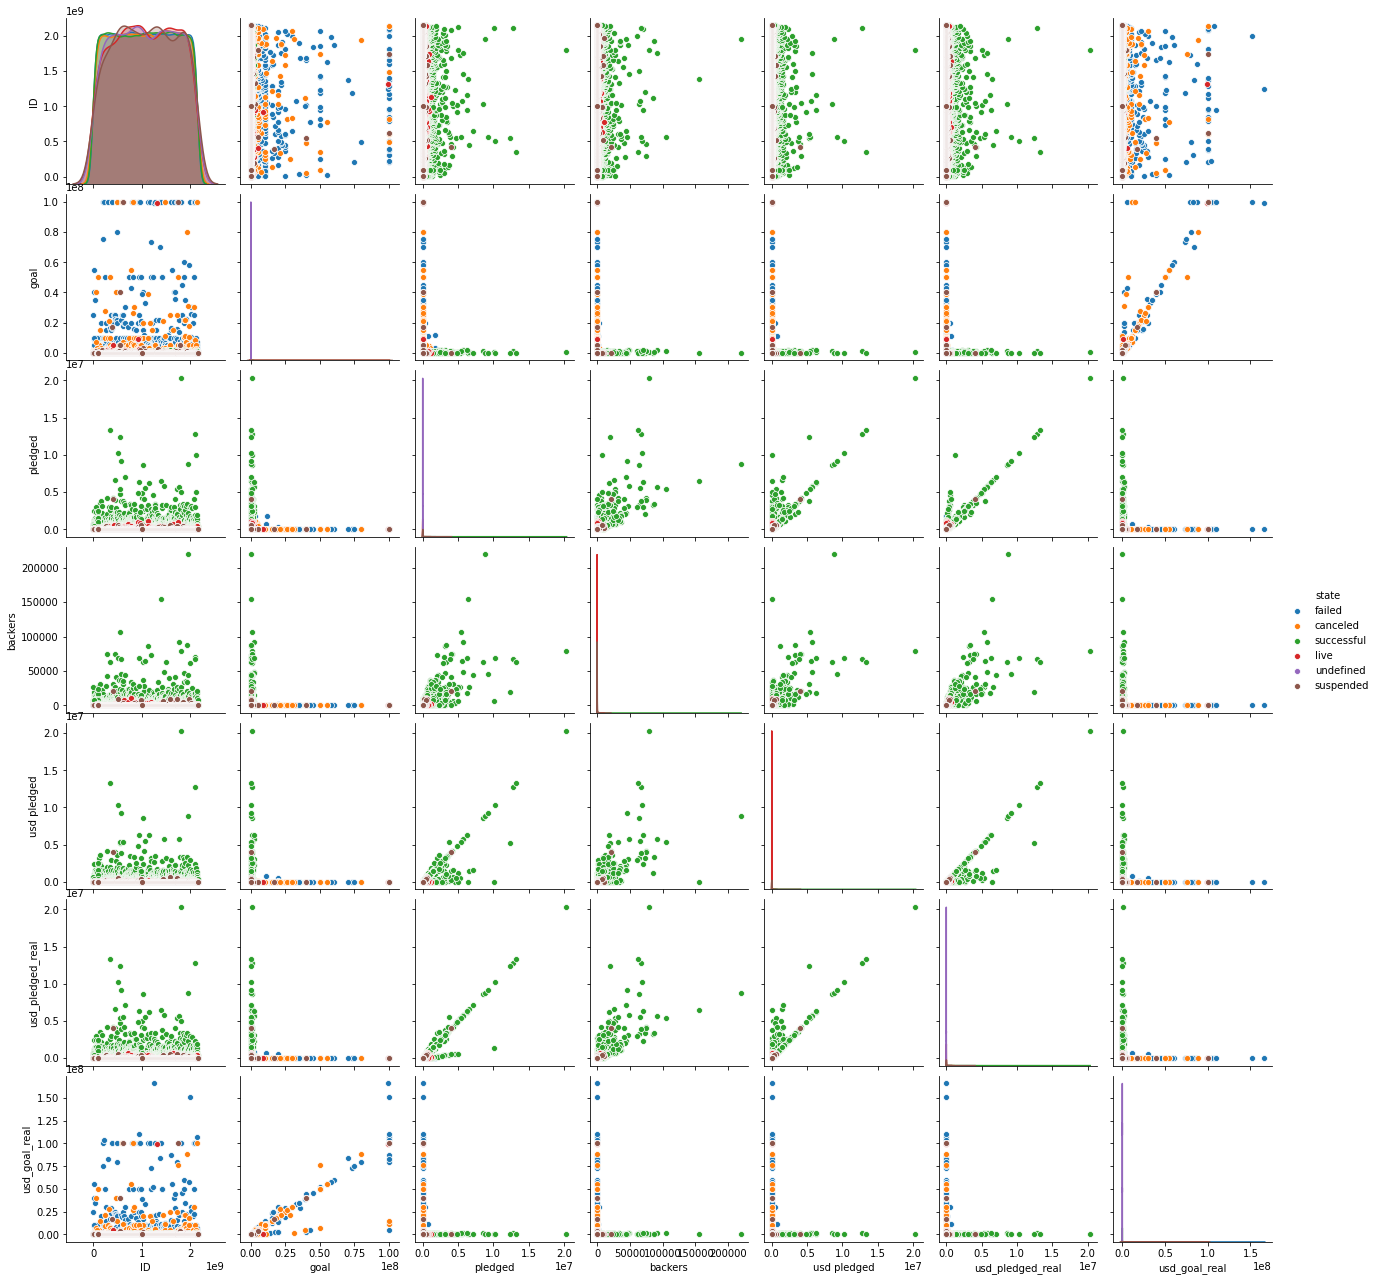

In [7]:
sns.pairplot(initialdf, hue="state")

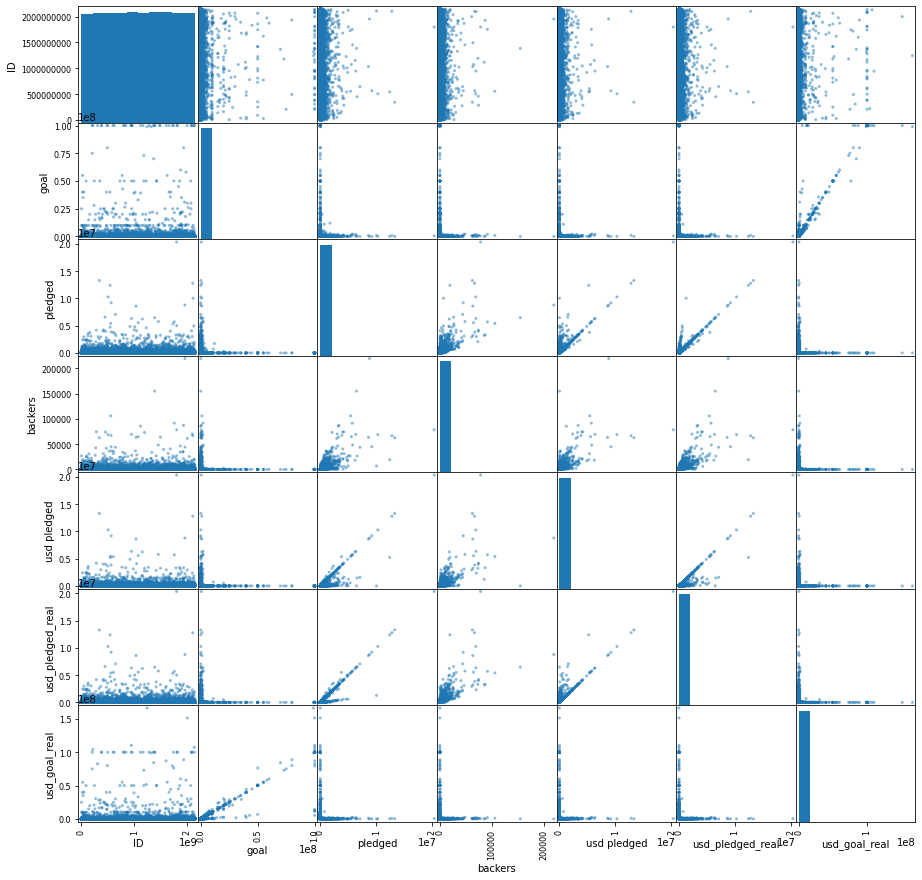

In [8]:
# 散布図行列
pd.plotting.scatter_matrix(initialdf, figsize=(15,15))
plt.show()

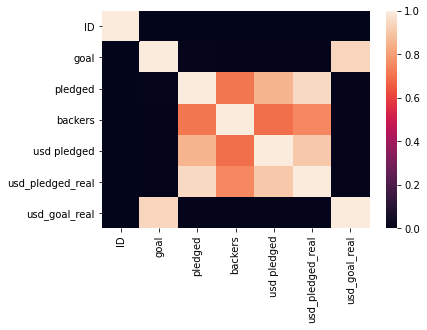

In [9]:
# 相関係数をヒートマップにして可視化
sns.heatmap(initialdf.corr())
plt.show()

In [10]:
# 相関係数を確認
initialdf.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


## 目的変数を決める

In [11]:
initialdf['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

・DAY2までは, 目的変数(state)の種類が多いため,「successful」と「failed」のみにしていたが

・DAY3から 多クラスを扱えるようになったため,全ての目的変数を扱う

## 用いる説明変数を決める

説明変数に用いる変数の選択  
・欠損値のないもの  
・質的変数の中でカテゴリーの多すぎないもの

In [12]:
initialdf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [13]:
for i in initialdf.columns:
    print('column名:{}, Dtype:{}, カテゴリ数:{}個'.format(i, initialdf[i].dtype, len(initialdf[i].value_counts())))

column名:ID, Dtype:int64, カテゴリ数:378661個
column名:name, Dtype:object, カテゴリ数:375764個
column名:category, Dtype:object, カテゴリ数:159個
column名:main_category, Dtype:object, カテゴリ数:15個
column名:currency, Dtype:object, カテゴリ数:14個
column名:deadline, Dtype:object, カテゴリ数:3164個
column名:goal, Dtype:float64, カテゴリ数:8353個
column名:launched, Dtype:object, カテゴリ数:378089個
column名:pledged, Dtype:float64, カテゴリ数:62130個
column名:state, Dtype:object, カテゴリ数:6個
column名:backers, Dtype:int64, カテゴリ数:3963個
column名:country, Dtype:object, カテゴリ数:23個
column名:usd pledged, Dtype:float64, カテゴリ数:95455個
column名:usd_pledged_real, Dtype:float64, カテゴリ数:106065個
column名:usd_goal_real, Dtype:float64, カテゴリ数:50339個


In [14]:
initialdf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

結果より, 説明変数は, main_category(object), currency(object), goal, pledged, backers, country(object), usd_pledged_real, usd_goal_realを用いることにする

[Discussion]  
Pledge > Goals means the kick-starter has raised enough funds so it's successful. So at least don't use the pledge column.  
Pledgeを使うとリークにつながるので, 使うなというDiscussionがあった  
URL:https://www.kaggle.com/kemical/kickstarter-projects/discussion/170598  

そのため説明変数から, pledge, usd_pledged_realを外す

In [3]:
X_df = initialdf[["main_category", "currency", "goal", "backers", "country", "usd_goal_real"]]
y_df = initialdf["state"].map({initialdf['state'].unique()[0]:0, initialdf['state'].unique()[1]:1, initialdf['state'].unique()[2]:2,\
                                initialdf['state'].unique()[3]:3, initialdf['state'].unique()[4]:4,\
                                initialdf['state'].unique()[5]:5})
display(X_df.head())
X_df.info()

,main_category,currency,goal,backers,country,usd_goal_real
0,Publishing,GBP,1000.0,0,GB,1533.95
1,Film & Video,USD,30000.0,15,US,30000.00
2,Film & Video,USD,45000.0,3,US,45000.00
3,Music,USD,5000.0,1,US,5000.00
4,Film & Video,USD,19500.0,14,US,19500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   main_category  378661 non-null  object 
 1   currency       378661 non-null  object 
 2   goal           378661 non-null  float64
 3   backers        378661 non-null  int64  
 4   country        378661 non-null  object 
 5   usd_goal_real  378661 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.3+ MB


## 前処理(ダミー変数化・標準化)

In [4]:
X_df_d = pd.get_dummies(X_df)
print(len(y_df))
X_df_d.info()

378661
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   goal                        378661 non-null  float64
 1   backers                     378661 non-null  int64  
 2   usd_goal_real               378661 non-null  float64
 3   main_category_Art           378661 non-null  uint8  
 4   main_category_Comics        378661 non-null  uint8  
 5   main_category_Crafts        378661 non-null  uint8  
 6   main_category_Dance         378661 non-null  uint8  
 7   main_category_Design        378661 non-null  uint8  
 8   main_category_Fashion       378661 non-null  uint8  
 9   main_category_Film & Video  378661 non-null  uint8  
 10  main_category_Food          378661 non-null  uint8  
 11  main_category_Games         378661 non-null  uint8  
 12  main_category_Journalism    378661 non-null  uint8  
 13  main_ca

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

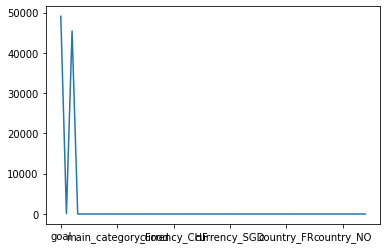

In [5]:
X_df_d.mean().plot()

・平均値の大きな変数が混じっているので標準化しておく

In [6]:
# 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X_df_d)

## クラスタリング

In [19]:
# クラスタリング
clf = KMeans(n_clusters=len(y_df.unique()))
clf.fit(X_std)
y_pred = clf.predict(X_std)
print(y_pred)
print(clf.cluster_centers_)

[5 0 0 ... 0 0 0]
[[-1.20976929e-02  4.29180075e-03 -1.13609376e-02  1.20700119e-03
   1.51165739e-03 -3.73541554e-03  5.45017224e-03 -7.34004575e-03
  -9.59014761e-03  8.64647137e-03  6.96578045e-03 -1.78489245e-02
  -2.65444389e-03  2.72033834e-02 -5.46629766e-03  2.33373980e-03
  -1.48785997e-02 -4.42724784e-03 -1.46442059e-01 -2.02826068e-01
   8.16295190e-03  1.00132375e-02  4.03470244e-02 -3.14751622e-01
   7.44575343e-03  1.89283457e-03  1.25094130e-02  7.90564504e-03
   1.15160420e-02 -6.88789067e-02  7.05545003e-03  3.46439006e-01
   7.31795132e-03 -1.45394369e-01  7.43971708e-03 -2.01367933e-01
   8.12431763e-03  1.94050583e-02  9.94100201e-03  1.43203947e-02
   1.62517550e-02 -3.12414968e-01  7.44575343e-03  8.53170297e-03
   1.60801625e-02  1.89283457e-03  2.35662851e-03  1.25094130e-02
  -6.82683233e-03  1.60157930e-02  7.82566998e-03  1.14057902e-02
  -6.82763832e-02  7.05545003e-03  3.39295029e-01]
 [ 8.27478859e-03 -2.72823105e-02  8.23566711e-04 -7.96034195e-02
  -2.95

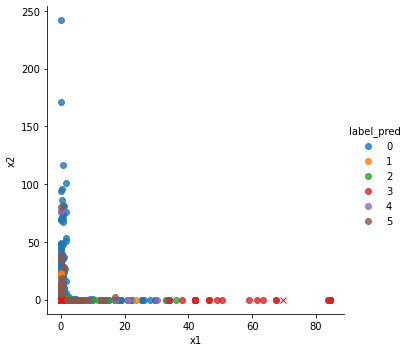

In [30]:
# クラスタリング結果の描画, 赤×は中心点
df_data = pd.DataFrame(X_std[:, :2], columns=["x1","x2"])
df_data["label_pred"] = y_pred
sns.lmplot(x="x1", y="x2", hue="label_pred", data=df_data,fit_reg=False)
plt.plot(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1], marker="x",ls="",color="r")

## エルボー図

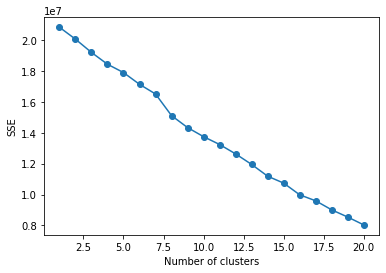

In [31]:
def plot_elbow(X, sta_k, end_k):
    sse = []
    for i in range(sta_k, end_k+1):
        clf = KMeans(n_clusters=i,random_state=1234)
        clf.fit(X)
        sse.append(clf.inertia_)

    plt.plot(range(sta_k, end_k+1), sse, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()
    
plot_elbow(X_std, 1, 20)

## 主成分分析の実行

In [33]:
from sklearn.decomposition import PCA #主成分分析用ライブラリ

pca = PCA(n_components=len(X_df_d.columns)) #主成分分析用のオブジェクトをつくる。削減後の次元数を引数で指定する。
pca.fit(X_df_d) #主成分分析の実行

PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.components_

array([[ 7.16811402e-01,  2.40679147e-06,  6.97267104e-01, ...,
         3.60331054e-10, -2.25243172e-11, -1.34260636e-09],
       [ 6.97267104e-01, -4.90713523e-06, -7.16811402e-01, ...,
         1.22597782e-08,  4.10035137e-11, -2.47257063e-08],
       [ 1.69636846e-06,  9.99999999e-01, -5.19566706e-06, ...,
        -4.91491240e-08,  3.65718064e-08,  7.00517011e-06],
       ...,
       [-0.00000000e+00,  3.50325051e-19, -1.77589406e-19, ...,
        -6.03173697e-02,  3.87676680e-01, -6.03173697e-02],
       [ 0.00000000e+00,  2.53826575e-19, -2.16187398e-19, ...,
         7.55872949e-04, -3.08550079e-01,  7.55872949e-04],
       [ 0.00000000e+00, -4.44460687e-20,  7.42594611e-20, ...,
         3.64247901e-04, -2.50594623e-01,  3.64247901e-04]])

In [35]:
print("寄与率=",pca.explained_variance_ratio_)
print("合計＝", pca.explained_variance_ratio_.sum())

寄与率= [9.71365675e-01 2.86340239e-02 3.01485356e-07 1.59655381e-13
 5.78837280e-14 4.66941548e-14 4.35765328e-14 3.64077510e-14
 3.28118152e-14 3.02125298e-14 2.78798485e-14 2.49365547e-14
 2.40618558e-14 2.25860935e-14 1.63343161e-14 1.28841392e-14
 1.05033632e-14 1.04284933e-14 8.80919831e-15 5.62375406e-15
 4.89611295e-15 4.26994197e-15 3.80587378e-15 3.66371806e-15
 3.39932129e-15 2.96960732e-15 2.82127969e-15 2.77910735e-15
 2.32493259e-15 2.30604092e-15 1.65890690e-15 1.41678961e-15
 1.24247016e-15 1.10388277e-15 9.42551399e-16 6.71880786e-16
 5.86192999e-16 4.14139134e-16 1.38498988e-16 8.28469629e-17
 7.17553219e-17 6.53836900e-17 3.54493012e-17 1.59271218e-17
 1.39332733e-17 8.37891680e-18 7.01076467e-18 3.58875575e-18
 5.12207293e-33 5.12207293e-33 5.12207293e-33 5.12207293e-33
 5.12207293e-33 5.12207293e-33 5.12207293e-33]
合計＝ 1.0000000000000004
